In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # used for splitting the data in to test and training
from sklearn.impute import SimpleImputer # used for replacing bad data 

In [3]:
# Import data in a data frame
banking_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [125]:
#Make sure data is imported
banking_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [126]:
# Get Shape of the dataset
banking_data.shape

(5000, 14)

In [127]:
banking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [128]:
banking_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.00,2500.50,1443.52,1.00,1250.75,2500.50,3750.25,5000.00
Age,5000.00,45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,5000.00,20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,5000.00,73.77,46.03,8.00,39.00,64.00,98.00,224.00
ZIP Code,5000.00,93152.50,2121.85,9307.00,91911.00,93437.00,94608.00,96651.00
Family,5000.00,2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,5000.00,1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,5000.00,1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,5000.00,56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal Loan,5000.00,0.10,0.29,0.00,0.00,0.00,0.00,1.00


In [129]:
#How can the experience be -3.0
#Also ID is one to one and zip code is not making sense here 
#First lets remove ID and Zip Code
bd_updated = banking_data.drop(['ID', 'ZIP Code'],axis=1)

In [130]:
bd_updated.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.60,1,0,0,1,0,0,0
1,45,19,34,3,1.50,1,0,0,1,0,0,0
2,39,15,11,1,1.00,1,0,0,0,0,0,0
3,35,9,100,1,2.70,2,0,0,0,0,0,0
4,35,8,45,4,1.00,2,0,0,0,0,0,1


In [131]:
#Also we need to clean up the data how can some one have -ve experience
#We can change it to 0
#Filter data which have negative experience and convert to 0 
bd_updated[bd_updated['Experience'] < 0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,2,7.20,1,0,0,1,0,0,1


In [132]:
# We should try to update the data which is less than 0
bd_updated['Experience'].mask(bd_updated['Experience'] < 0, 0, inplace=True)

In [133]:
bd_updated[bd_updated['Experience'] == 0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,0,113,4,2.30,3,0,0,0,0,0,1
105,24,0,35,3,0.10,2,0,0,1,0,1,0
151,26,0,132,3,6.50,3,0,1,0,0,0,1
155,24,0,60,4,1.60,1,0,0,0,0,1,0
156,26,0,15,4,0.40,1,0,0,0,0,0,1
160,29,0,134,4,6.50,3,0,1,0,0,0,0
182,24,0,135,1,1.50,1,0,0,0,0,1,0
226,24,0,39,2,1.70,2,0,0,0,0,0,0
256,26,0,99,4,2.30,3,0,0,0,0,0,1
315,24,0,51,3,0.30,3,0,0,0,0,1,0


In [134]:
bd_updated.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.00,45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,5000.00,20.12,11.44,0.00,10.00,20.00,30.00,43.00
Income,5000.00,73.77,46.03,8.00,39.00,64.00,98.00,224.00
Family,5000.00,2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,5000.00,1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,5000.00,1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,5000.00,56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal Loan,5000.00,0.10,0.29,0.00,0.00,0.00,0.00,1.00
Securities Account,5000.00,0.10,0.31,0.00,0.00,0.00,0.00,1.00
CD Account,5000.00,0.06,0.24,0.00,0.00,0.00,0.00,1.00


In [135]:
#Does data have null values
bd_updated.nunique()

Age                    45
Experience             44
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

It seems Family, Education, Personal Loan, Securities Account, CD Account, Online and CreditCard are categorical data
Income, CCAVg and Mortgage are continuous data
Age and experience can be treated as continuous variable as well as categorical data lets go with categorical data

In [136]:
bd_updated['Age'].value_counts(normalize=True)

35   0.03
43   0.03
52   0.03
58   0.03
54   0.03
50   0.03
41   0.03
30   0.03
56   0.03
34   0.03
39   0.03
59   0.03
57   0.03
51   0.03
60   0.03
45   0.03
46   0.03
42   0.03
40   0.03
31   0.03
55   0.03
62   0.02
29   0.02
61   0.02
44   0.02
32   0.02
33   0.02
48   0.02
38   0.02
49   0.02
47   0.02
53   0.02
63   0.02
36   0.02
37   0.02
28   0.02
27   0.02
65   0.02
64   0.02
26   0.02
25   0.01
24   0.01
66   0.00
23   0.00
67   0.00
Name: Age, dtype: float64

In [137]:
bd_updated['Experience'].value_counts(normalize=True)

32   0.03
20   0.03
9    0.03
5    0.03
23   0.03
35   0.03
25   0.03
28   0.03
18   0.03
19   0.03
26   0.03
24   0.03
3    0.03
16   0.03
14   0.03
30   0.03
34   0.03
17   0.03
27   0.03
22   0.02
29   0.02
7    0.02
15   0.02
8    0.02
6    0.02
0    0.02
10   0.02
33   0.02
13   0.02
37   0.02
11   0.02
36   0.02
21   0.02
4    0.02
31   0.02
12   0.02
38   0.02
39   0.02
2    0.02
1    0.01
40   0.01
41   0.01
42   0.00
43   0.00
Name: Experience, dtype: float64

Experience and Age is symmetrically divided it seems we can use it as continuous variable only

In [138]:
#number of people with 0 mortgage
banking_data[bd_updated['Mortgage']==0].count()['Mortgage']

3462

In [139]:
#number of people with 0 ccusage
banking_data[bd_updated['CCAvg']==0].count()['CCAvg']

106

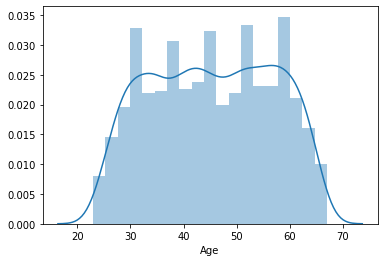

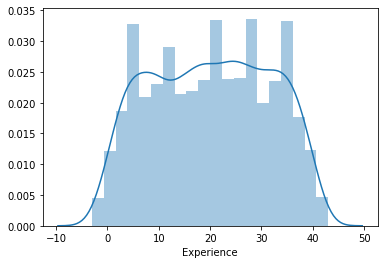

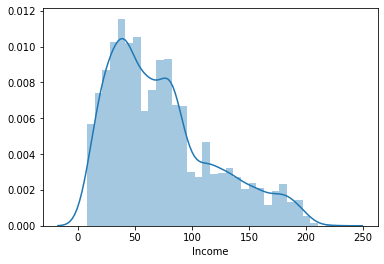

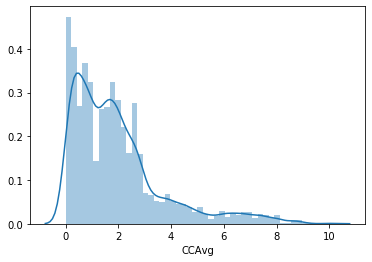

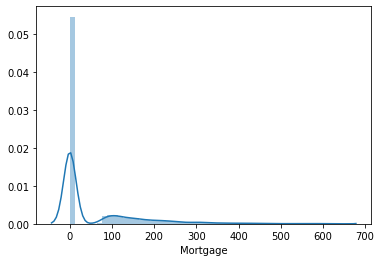

In [140]:
# distplot for continous columns
for i in ['Age','Experience','Income','CCAvg','Mortgage']:
    sns.distplot(banking_data[i])
    plt.show()

In [141]:
#Does data have null values
bd_updated.nunique()

Age                    45
Experience             44
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

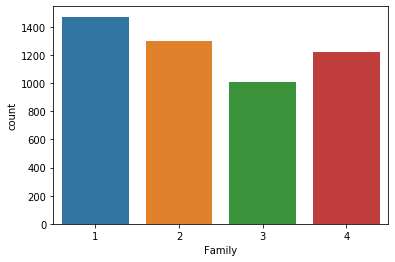

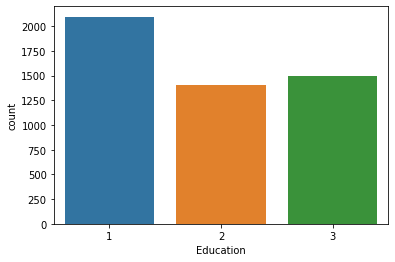

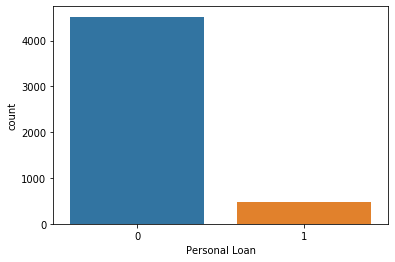

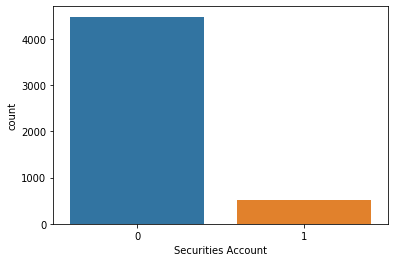

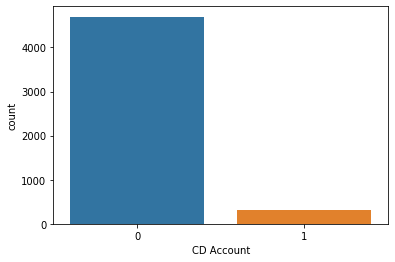

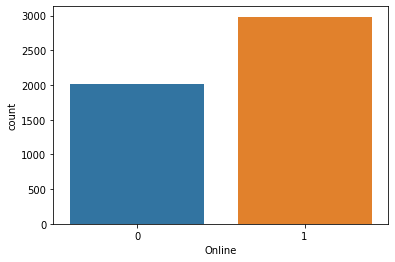

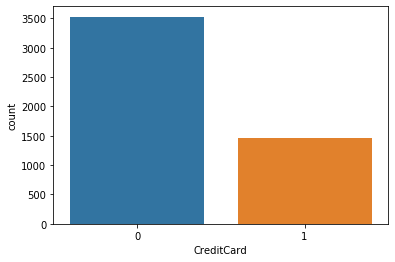

In [142]:
# checking division of data across all categorical data
for i in ['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']:   
     sns.countplot(bd_updated[i])
     plt.show()

In [143]:
# get division of data across all categorical data
for i in ['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']:  
    print(bd_updated[i].value_counts(normalize=True))
    print()

1   0.29
2   0.26
4   0.24
3   0.20
Name: Family, dtype: float64

1   0.42
3   0.30
2   0.28
Name: Education, dtype: float64

0   0.90
1   0.10
Name: Personal Loan, dtype: float64

0   0.90
1   0.10
Name: Securities Account, dtype: float64

0   0.94
1   0.06
Name: CD Account, dtype: float64

1   0.60
0   0.40
Name: Online, dtype: float64

0   0.71
1   0.29
Name: CreditCard, dtype: float64



# Bivariate 

In [144]:
#Find relationship between Personal Loan and Categorical Data
for col in bd_updated.columns: 
    if(col not in ['Personal Loan','Age','Experience','CCAvg','Income','Mortgage']):
        print(pd.crosstab(bd_updated[col],bd_updated['Personal Loan'],normalize='index'))

Personal Loan    0    1
Family                 
1             0.93 0.07
2             0.92 0.08
3             0.87 0.13
4             0.89 0.11
Personal Loan    0    1
Education              
1             0.96 0.04
2             0.87 0.13
3             0.86 0.14
Personal Loan         0    1
Securities Account          
0                  0.91 0.09
1                  0.89 0.11
Personal Loan    0    1
CD Account             
0             0.93 0.07
1             0.54 0.46
Personal Loan    0    1
Online                 
0             0.91 0.09
1             0.90 0.10
Personal Loan    0    1
CreditCard             
0             0.90 0.10
1             0.90 0.10


No difference in Personal Loan because of online or credit card dropping both the columns 

In [145]:
bd_updated.drop(['Online','CreditCard'],axis=1, inplace=True)

In [146]:
bd_updated.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account
0,25,1,49,4,1.60,1,0,0,1,0
1,45,19,34,3,1.50,1,0,0,1,0
2,39,15,11,1,1.00,1,0,0,0,0
3,35,9,100,1,2.70,2,0,0,0,0
4,35,8,45,4,1.00,2,0,0,0,0


Model building using statsmodels.api

In [147]:
## Define X and Y variables
X = bd_updated.drop('Personal Loan', axis=1)
Y = bd_updated[['Personal Loan']]

In [153]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [154]:
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account
0,25,1,49,4,1.60,1,0,1,0
1,45,19,34,3,1.50,1,0,1,0
2,39,15,11,1,1.00,1,0,0,0
3,35,9,100,1,2.70,2,0,0,0
4,35,8,45,4,1.00,2,0,0,0


In [155]:
Y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [156]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

In [157]:
X_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account
1334,47,22,35,2,1.30,1,0,0,0
4768,38,14,39,1,2.00,2,0,0,0
65,59,35,131,1,3.80,1,0,0,0
177,29,3,65,4,1.80,2,244,0,0
4489,39,13,21,3,0.20,2,0,0,0


In [163]:
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.129154
         Iterations 9


/Users/home/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [164]:
# printing the summary table 
print(lg.summary()) 

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3490
Method:                           MLE   Df Model:                            9
Date:                Fri, 07 Aug 2020   Pseudo R-squ.:                  0.5874
Time:                        00:20:57   Log-Likelihood:                -452.04
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                2.145e-271
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.6723      1.919     -7.126      0.000     -17.433      -9.912
Age                   -0.0189      0.071     -0.267      0.790      -0.158       0.120
Experience          

In [165]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [166]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
CD Account,2.75,15.59,0.94,0.00
Education,1.73,5.62,0.85,0.00
Family,0.72,2.05,0.67,0.00
CCAvg,0.16,1.18,0.54,0.00
Income,0.05,1.05,0.51,0.00
Securities Account,-0.85,0.43,0.30,0.02
const,-13.67,0.00,0.00,0.00


Model building using Logistic Regression from Sklearn

In [173]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=41,max_iter=1000)
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=41, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [174]:
y_predict = logreg.predict(X_test)

In [175]:
#This is taken from work book
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy 0.9485714285714286

Testing accuracy 0.944

Confusion Matrix


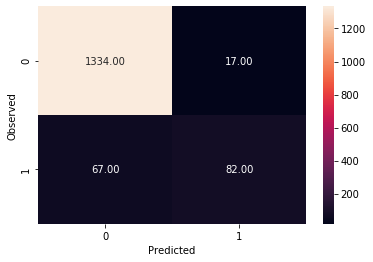

None
Recall: 0.5503355704697986

Precision: 0.8282828282828283

F1 Score: 0.6612903225806452

Roc Auc Score: 0.7688761494095847


In [177]:
#This is taken from work book
print("Training accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

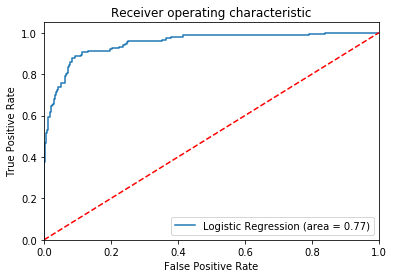

In [179]:
#Taken from case study 
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Improving Model Performance via Checking Parameters of Logistic Regression

In [180]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 41,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [185]:
train_score=[]
test_score=[]
solvers = ['newton-cg','lbfgs','liblinear','sag','saga'] #Different solvers available
for solver in solvers:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=solver,max_iter=10000)  # changing values of solver
    model.fit(X_train, y_train.values.ravel()) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    print(solver)

print()
print(train_score)
print()
print(test_score)

newton-cg
lbfgs
liblinear
sag
saga

[0.948, 0.949, 0.949, 0.948, 0.944]

[0.944, 0.944, 0.948, 0.947, 0.943]


In [187]:
train_score=[]
test_score=[]
solvers = ['liblinear','saga'] 
for solver in solvers:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=solver,max_iter=10000)  # changing values of solver
    model.fit(X_train, y_train.values.ravel()) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    print(solver)

print()
print(train_score)
print()
print(test_score)

liblinear
saga

[0.949, 0.944]

[0.947, 0.943]


Liblinear is the most closest one out of all and best fit so we can use it

In [197]:
#Trying with balanced class 
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(X_train, y_train.values.ravel()) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

Trainig accuracy 0.9008571428571429

Testing accuracy 0.9


It seems with class_Weight balanced the accuracy kind of detoriates

In [200]:
train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.20,0.30,0.35,0.40,0.45,0.50, 0.60, 0.70,0.75,0.90,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', C=i, max_iter=10000)  # changing values of C
    model.fit(X_train, y_train.values.ravel()) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.2, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7, 0.75, 0.9, 1]

[0.923, 0.948, 0.948, 0.949, 0.949, 0.949, 0.948, 0.948, 0.949, 0.948, 0.949, 0.949, 0.949]

[0.921, 0.946, 0.945, 0.947, 0.948, 0.948, 0.946, 0.946, 0.945, 0.947, 0.947, 0.946, 0.945]


In [201]:
#Best accuracy of the model is 0.35 or 0.40

Trainig accuracy 0.9491428571428572

Testing accuracy 0.948

Confusion Matrix


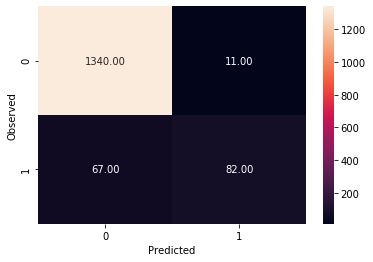

None

Recall: 0.5503355704697986

Precision: 0.8817204301075269

F1 Score: 0.6776859504132231

Roc Auc Score: 0.7710967267596956


In [203]:
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',C=0.35) 
model.fit(X_train, y_train.values.ravel())
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [206]:
pip install yellowbrick

     |████████████████████████████████| 263 kB 2.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


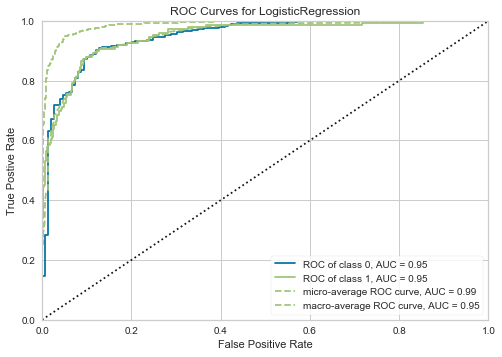

In [207]:
from yellowbrick.classifier import ClassificationReport, ROCAUC

roc = ROCAUC(model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

Business Insights
Confusion matrix means

True Positive (observed=1,predicted=1):

Predicted that an account holder will ask for the personal loan and actually did.
False Positive (observed=0,predicted=1):

Predicted that personal loan was requested and the account holder did not request it.

True Negative (observed=0,predicted=0):

Predicted that personal loan was not requested and the account holder did not request it.

False Negative (observed=1,predicted=0):

Predicted that personal loan was not requested and the account holder did request it.

The bank wants to predict which of the customers are more likely to ask for the personal loan and based on that they can look at other aspects. 

After achieving the desired accuracy we can deploy the model for practical use. As in the bank now can predict how many account holders can ask for the personal loan based on the criteria. They can use the model for upcoming account holders.